# Part I - (Dataset Exploration Title)
## by (Adedoyin Elizabeth Oyekanmi)

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area called '201902-fordgobike-tripdata'.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import chardet


%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df = pd.read_csv('201902-fordgobike-tripdata (2).csv')
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
#checking the shape and columns of the data
print(df.shape)
print(df.columns)

(183412, 16)
Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [7]:
df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

### Quality issues
1. datatype of start_time and end_time should be datetime datatype not object
2. datatype of bike_id should be integer and not float 
3. extracting month, weekday, time (periods) from the start_time column

#### Cleaning Data
Make a copy of the original data before cleaning.

In [8]:
df_new =df.copy()

### Issue 1:
datatype of start_time and end_time should be datetime datatype not object

#### Define
Convert start_time and end_time to datetime data type using pandas

#### Code

In [9]:
# convert start_time and end_time to datetime datatype and convert bike_id to integer
df_new['start_time'] = pd.to_datetime(df_new['start_time'], errors='coerce')
df_new['end_time'] = pd.to_datetime(df_new['end_time'], errors='coerce')
df_new['bike_id']= df_new['bike_id'].astype(int)


#### Test

In [10]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int32
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: datetime64[ns](2), float64(7), int32(1), int64(1), object(5)

### Issue 2:
null values in the member_birth_year and member_gender columns

#### Define
fill the null values in member_birth_year and member_gender columns with the mode of the columns

#### Code

In [11]:
df_new['member_birth_year'].mode()


0    1988.0
dtype: float64

In [12]:
#filling the null values with the mode of the columns
df_new.member_birth_year = df_new.member_birth_year.fillna(df['member_birth_year'].mode()[0])
df_new.member_gender = df_new.member_gender.fillna(df['member_gender'].mode()[0])


In [13]:
# converting the member_birth_year to integer datatype
df_new.member_birth_year = df_new.member_birth_year.astype(int)

#### Test

In [14]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int32
user_type                  183412 non-null object
member_birth_year          183412 non-null int32
member_gender              183412 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: datetime64[ns](2), float64(6), int32(2), int64(1), object(5)
m

In [15]:
# Extracting the year and month to check if it varies
df_new['Year'] = df_new['start_time'].dt.year 
df_new['Month'] = df_new['start_time'].dt.month 
df_new

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Year,Month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,2019,2
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,1988,Male,No,2019,2
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,2019,2
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,2019,2
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,2019,2
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,2019,2
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983,Female,No,2019,2
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989,Male,No,2019,2
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988,Other,No,2019,2
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992,Male,No,2019,2


In [16]:
# Extracting the day of the week in which rides was taken from start_time
df_new['start_time'] = pd.to_datetime(df_new['start_time'], format = '%d/%m/%Y %H:%M:%S')
df_new['weekday'] = df_new['start_time'].dt.weekday_name

In [17]:
df_new

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Year,Month,weekday
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,2019,2,Thursday
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,1988,Male,No,2019,2,Thursday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,2019,2,Thursday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,2019,2,Thursday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,2019,2,Thursday
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,2019,2,Thursday
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983,Female,No,2019,2,Thursday
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989,Male,No,2019,2,Thursday
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988,Other,No,2019,2,Thursday
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992,Male,No,2019,2,Thursday


In [18]:
#checking the counts of each day a bike ride was taken
df_new['weekday'].value_counts()

Thursday     35197
Tuesday      31813
Wednesday    29641
Friday       28981
Monday       26852
Sunday       15523
Saturday     15405
Name: weekday, dtype: int64

In [19]:
# extracting the hour from the start_time by first extracting time from it
df_new['time'] = df_new['start_time'].dt.time
df_new['hour'] =df_new['start_time'].dt.hour
df_new['hour']

0         17
1         18
2         12
3         17
4         23
          ..
183407     0
183408     0
183409     0
183410     0
183411     0
Name: hour, Length: 183412, dtype: int64

In [20]:
# converting the hours into categories of late night, early morning, morning, noon, evening, and night
df_new['periods'] = (df_new['hour'] % 24 + 4) // 4
df_new['periods'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace = True)

In [21]:
df_new.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Year,Month,weekday,time,hour,periods
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984,Male,No,2019,2,Thursday,17:32:10.145000,17,Evening
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,Customer,1988,Male,No,2019,2,Thursday,18:53:21.789000,18,Evening
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972,Male,No,2019,2,Thursday,12:13:13.218000,12,Noon
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989,Other,No,2019,2,Thursday,17:54:26.010000,17,Evening
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974,Male,Yes,2019,2,Thursday,23:54:18.549000,23,Night


In [22]:
df_new.to_csv('df_new.csv', index=False)

### What is the structure of your dataset?

> The data has 183412 individual rides in the dataset with 16 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip). Nine columns are numeric in nature while the variable columns include; start_station_name, end_station_name, member_gender, user_type, bike_share_for_all_trip which are nominal variables

### What is/are the main feature(s) of interest in your dataset?

> Your answer here!I'm most interested in the duration of a trip, the month with the highest trip and if the user_type is dependent on the duration of trip

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect the duration_sec, start_time and end_time user_type features should help to support my investigation

## Univariate Exploration

> In this section, I investigate distributions of individual variables.

#### Are there more short or long duration trips?

Text(0.5, 1.0, 'Histogram showing the frequency against log_scale duration_sec')

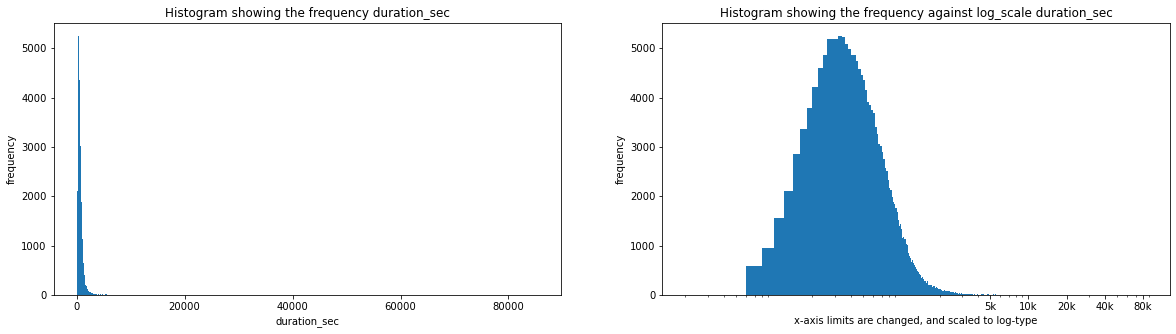

In [23]:
plt.figure(figsize = [20, 5]) 

plt.subplot(1, 2, 1) 
binsize =20
bins = np.arange(0, df_new['duration_sec'].max()+binsize, binsize)
plt.hist(data = df_new, x = 'duration_sec', bins = bins)
plt.xlabel('duration_sec')
plt.ylabel('frequency')
plt.title('Histogram showing the frequency duration_sec')

plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = 20
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)
plt.hist(data = df_new, x = 'duration_sec', bins = bins)

plt.xscale('log')
plt.xticks([5e3, 1e4, 2e4, 4e4, 8e4], ['5k', '10k', '20k', '40k', '80k'])
plt.xlabel('x-axis limits are changed, and scaled to log-type')
plt.ylabel('frequency')
plt.title('Histogram showing the frequency against log_scale duration_sec')

Very few trips have long time duration. Most of the trips duration lies below 5,000 duration_sec. In order to view the distribution properly, I have change the limits of the duration_sec and scaled to logarithm.

#### Which user_type is more based on the dataset?

In [24]:
def countplot(data, x, diagram_title):
    "A function that plot histogram with seaborn's countplot"
    color = sb.color_palette()[0]
    sb.countplot(data=data, x=x, color=color)
    plt.xticks(rotation=90)
    plt.xlabel(x)
    plt.title(diagram_title)
    plt.show()

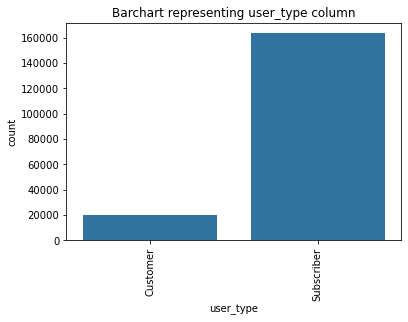

In [25]:
countplot(df_new,'user_type','Barchart representing user_type column')

There are more subcribers than customers in the data given

#### What is the variation in the gender type in the data given? 

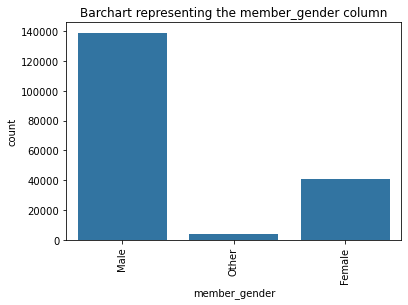

In [26]:
countplot(df_new,'member_gender', 'Barchart representing the member_gender column')

There are more male than female. those that identify as others are quite few.

#### Which year has the most member or highest count?

In [27]:
# checking for value count of member_birth_year
df_new['member_birth_year'].value_counts()

1988    18501
1993     9325
1989     8972
1990     8658
1991     8498
        ...  
1878        1
1930        1
1928        1
1927        1
1910        1
Name: member_birth_year, Length: 75, dtype: int64

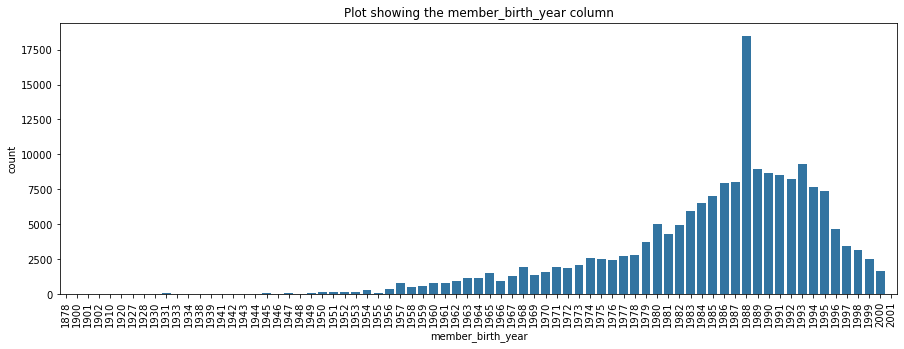

In [28]:
plt.figure(figsize=[15, 5])
countplot(df_new, 'member_birth_year', 'Plot showing the member_birth_year column')

From the graph above, 1988 born has the highest number of rides, followed by 1993 born. the plot is unimodal. The frequency started dropping after year 1988.

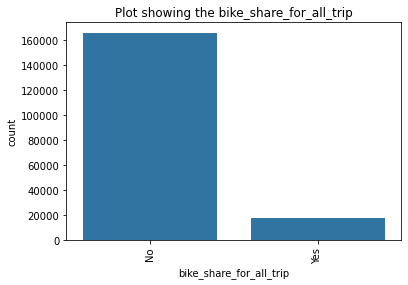

In [29]:
countplot(df_new, 'bike_share_for_all_trip', 'Plot showing the bike_share_for_all_trip')

Very few people have bike_share_for_all_trips.

#### When were trips taken during the day?

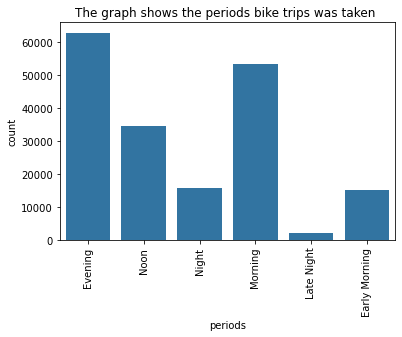

In [30]:
countplot(df_new, 'periods', 'The graph shows the periods bike trips was taken ')

Most of the trips were eveing trips, followed by the Morning trips. The late Night trips were the least.

#### Which day of the week had the most trip

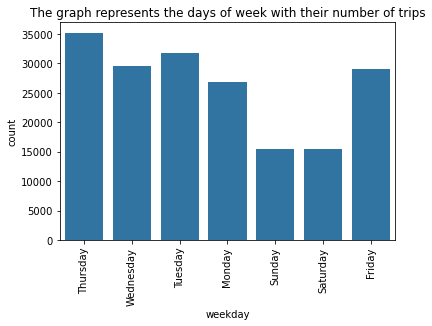

In [31]:
countplot(df_new, 'weekday', 'The graph represents the days of week with their number of trips')

Most trips were taken on Thursday while the least trips were on Sunday and Saturday.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I needed to perform transformation on the duration_sec plot because it was hard to tell what the values looked like. I did a log transformation and also set the bin to visualize the plot properly.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> For the member_gender and member_birth_year columns, I had to fill in the null values with their mode to visualize the frequency properly. I had to extract the day of the week (Monday, Tuesday, Wednesday, Thursday, Friday) when rides were taken from the start_time column and the period (Morning, Late Night, Early Morning, Morning, Noon, Evening, 'Night) the trips were taken.

## Bivariate Exploration

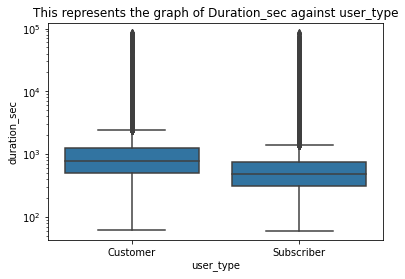

In [32]:
# comparing the duration_sec and user_type
color = sb.color_palette()[0]
sb.boxplot(data=df_new, y='duration_sec', x='user_type', color=color)
plt.title('This represents the graph of Duration_sec against user_type')
plt.yscale('log');

The median of the duration_sec for customer is higher than that of subcriber.

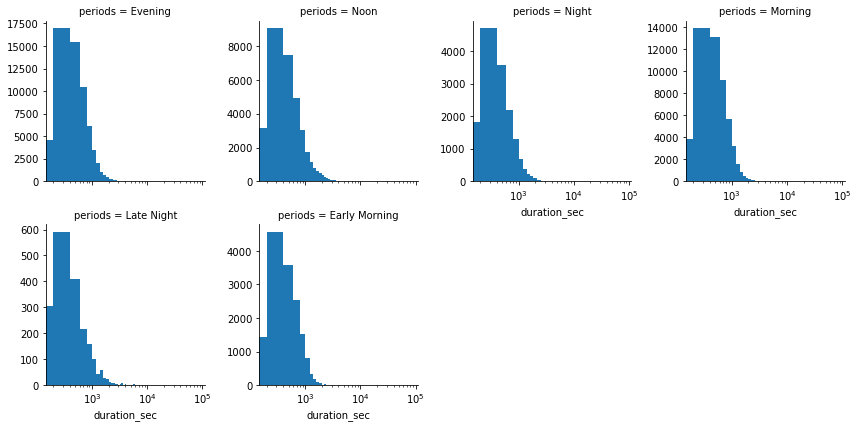

In [33]:
#checking the duration_sec with periods bike trips were taken
bin_edges = np.arange(0, 81800+200, 200)
g = sb.FacetGrid(data = df_new, col = 'periods', col_wrap=4, sharey=False)
g.map(plt.hist, 'duration_sec', bins = bin_edges)
plt.xscale('log');

From the graph above, trips taken in the evenings has longer duration_sec compared to trips taken late Night. The trips taken in the morning has the second best duration_sec.

#### Which member_birth_year had consistent high duration_sec?

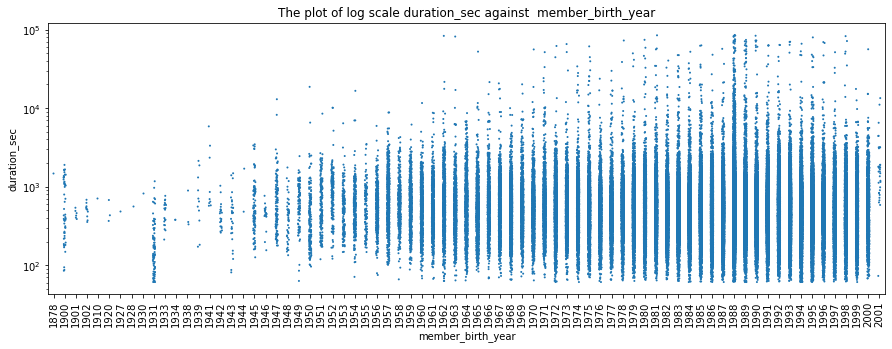

In [34]:
color = sb.color_palette()[0]
plt.figure(figsize=[15, 5])
sb.stripplot(data=df_new, y='duration_sec', x='member_birth_year', color=color, jitter=0.1, size=2)
plt.title('The plot of log scale duration_sec against  member_birth_year')
plt.xticks(rotation=90)
plt.yscale('log')
plt.xlabel('member_birth_year')
plt.ylabel('duration_sec');

In [35]:
#checking member_gender with the user_type column
def countplotb(data, x, hue, diagram_title):
    "A function that plot a clustered barchart with seaborn's countplot"
    color = sb.color_palette()[0]
    sb.countplot(data=data, x=x, color=color, hue =hue)
    plt.xticks(rotation=90)
    plt.xlabel(x)
    plt.title(diagram_title)
    plt.show()
    


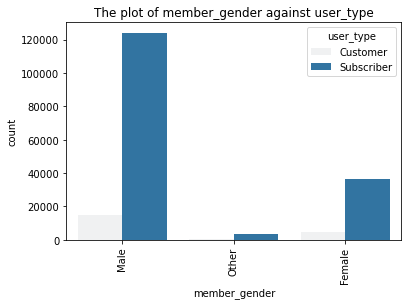

In [36]:
countplotb(df_new, 'member_gender', 'user_type','The plot of member_gender against user_type')

There more male subcriber than female subcriber. Customer user_type is low in frequency across the gender but male customer having more frequency than the others

<AxesSubplot:xlabel='member_gender', ylabel='user_type'>

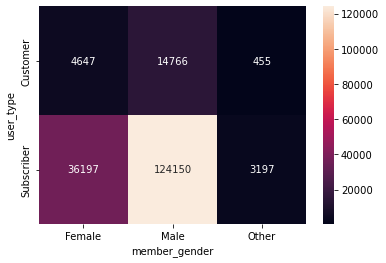

In [37]:
# Use group_by()to get the number user_type and each combination of the two variable levels as a pandas Series
ct_counts = df_new.groupby(['user_type', 'member_gender']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'user_type', columns = 'member_gender', values = 'count')

sb.heatmap(ct_counts, annot = True, fmt = 'd')

The heatmap above tells the count of usertype for each member gender. The male gender has highest count as a subscriber and customer.

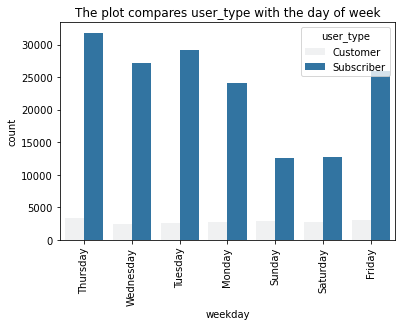

In [38]:
# comparing the day of week with the user_type
countplotb(df_new, 'weekday', 'user_type', 'The plot compares user_type with the day of week');

Thursday has the highest number of customer and subscriber bike trip. In general, subscriber show up for bike ride the most on every weekday.

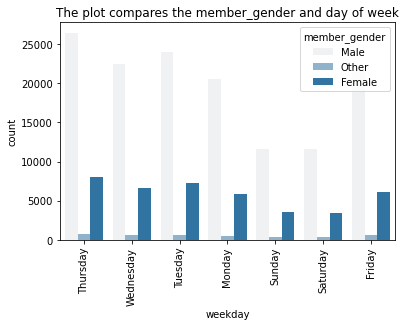

In [39]:
#comparing the member_gender and the day of week
countplotb(df_new, 'weekday', 'member_gender', 'The plot compares the member_gender and day of week')

Male gender take bike trips the most on thursday.

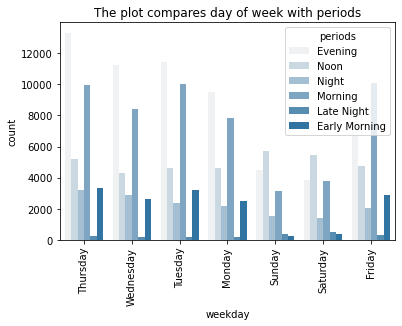

In [40]:
countplotb(df_new, 'weekday', 'periods', 'The plot compares day of week with periods');

Late Night trips are the lowest across the weekdays except on Saturday and Sunday. Morning and evening trips are higher on weekdays except Saturday and Sunday. There are less trips on Saturday and Sunday with noon having the highest number of trips.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In comparing the  duration_sec with periods trips were taken, trips taken on thursday had more long durations. There are more male subcribers than Female subcribers. Trips on Saturday and Sunday are low and have high rides in the noon. Morning trips are more on Friday than evening trips which happens to have highest number of trips in the univariant plot.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Morning trips are more on Friday than evening trips compared to thursday where evening trips are more than Morning trips.

## Multivariate Exploration


In [41]:
def boxplot(data, x, y, hue, diagram_title):
    "A function that plot a boxplot with seaborn's boxplot"
    color = sb.color_palette()[0]
    sb.boxplot(data=data, x=x, y=y , color=color, hue =hue)
    plt.xticks(rotation = 15)
    plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5))
    plt.xlabel(x)
    plt.yscale('log')
    plt.title(diagram_title)
    plt.show()

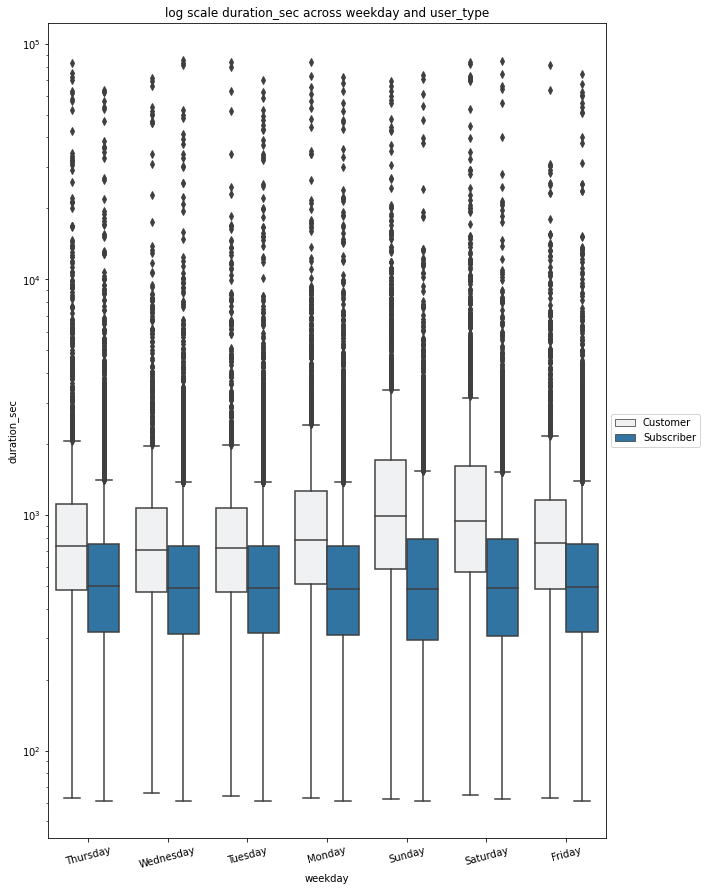

In [42]:
# comparing user_type, day_of_week, and period
plt.figure(figsize=[10, 15])
boxplot(df_new, 'weekday', 'duration_sec', 'user_type','log scale duration_sec across weekday and user_type');

Customer have more duration_sec compared to subscriber across the weekday. On Monday, Sunday, Saturday and Friday subscriber fall below the median duration_sec of customer. On Sunday, customer have the highest duration_sec followed by Saturday. Only on Saturday and Sunday the subscriber have duration_sec far lower than the customer.

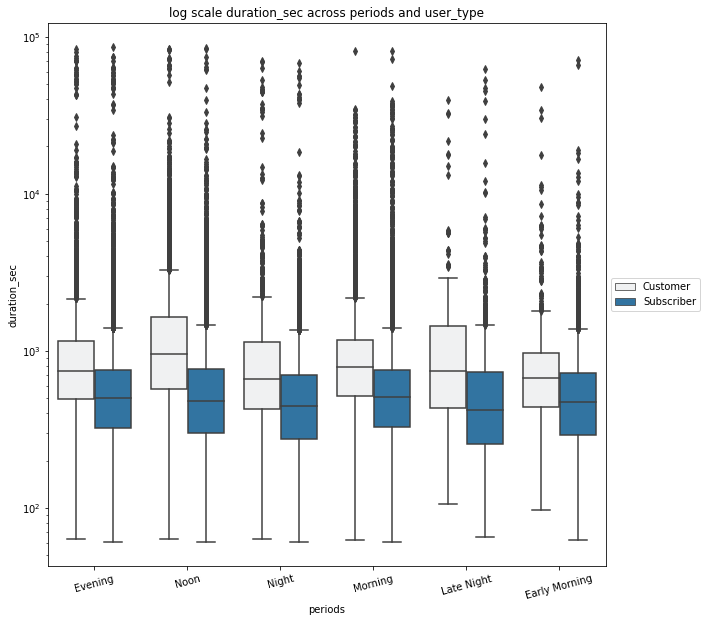

In [43]:
# comparing user_type, user_type, and periods
plt.figure(figsize=[10, 10])
boxplot(df_new,  'periods', 'duration_sec', 'user_type','log scale duration_sec across periods and user_type');

In general customer have high duration_sec than subscriber during the periods. During noon, Morning and late Night that subscriber's duration_sec fall below the median duration_sec of customer.

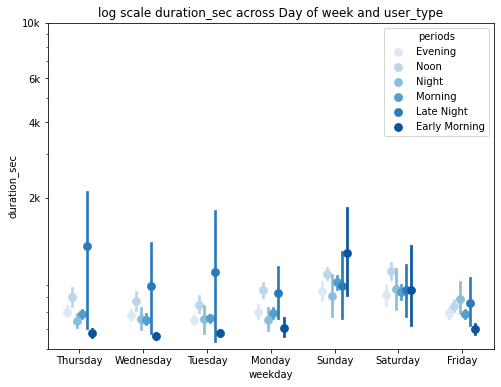

In [44]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = df_new, x = 'weekday', y = 'duration_sec', hue = 'periods',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('log scale duration_sec across Day of week and user_type')
plt.ylabel('duration_sec')
plt.yscale('log')
plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
plt.show();

Early morning trips are has the highest duration_sec on Sunday. On weekdays except Saturday and Sunday, early morning trips have the least duration_sec. Across the weekdays, late Night trips have more duration_sec if summed up compare to other periods.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The period, weekday and duration_sec strengthened each other. The user_type feature together with weekday and duration_sec gave an insight that the customer have longer duration_sec trips during the week. 

### Were there any interesting or surprising interactions between features?

> Yes, the periods trips were taken on weekday. Early morning trip had high duration_sec on weekends (Saturday and Sunday).

## Conclusions
>I had to focus on the start_time column to extract the month, day and time trips when taken. This gave me the opportunity to compare the extracted information with other columns like the duration_sec, user_type, member_gender, member_birth year and bike_share_for_all_trip. Some interesting findings were:

1. More male gender took bike trips.
2. customer user_type are fewer then the subscribe user_type.
3. customer user_type have more duration_sec than the subscribe user_type.
4. thursday is the weekday with the highest bike trip.
5. evening trips is the most common on thursday.